In [1]:
!pip install dowhy
import numpy as np
import pandas as pd
import dowhy
from dowhy import CausalModel
import dowhy.datasets
import dowhy.api

     |████████████████████████████████| 71kB 2.5MB/s 
     |████████████████████████████████| 286kB 9.5MB/s 
     |████████████████████████████████| 5.6MB 34.5MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
ERROR: econml 0.6.1 has requirement matplotlib<3.1, but you'll have matplotlib 3.1.3 which is incompatible.
ERROR: econml 0.6.1 has requirement scikit-learn~=0.21.0, but you'll have scikit-learn 0.22.1 which is incompatible.
  Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


In [2]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [4]:
import pandas as pd
import io
df = pd.read_excel("/content/no_removal_preprocessed_data.xlsx", index_col = 0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,target,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [5]:
corr = df.corr()['target'].sort_values()

# Display correlations
print('Top 10 - Positive Correlations:')
print('-----------------------------------')
print(corr.tail(10))
print('\nTop 10 - Negative Correlations:')
print('------------------------------')
print(corr.head(10))
print('------------------------------')
print(corr)

Top 10 - Positive Correlations:
-----------------------------------
PaperlessBilling                  0.191825
MonthlyCharges                    0.193356
DeviceProtection_No               0.252481
OnlineBackup_No                   0.268005
PaymentMethod_Electronic check    0.301919
InternetService_Fiber optic       0.308020
TechSupport_No                    0.337281
OnlineSecurity_No                 0.342637
Contract_Month-to-month           0.405103
target                            1.000000
Name: target, dtype: float64

Top 10 - Negative Correlations:
------------------------------
tenure                                 -0.352229
Contract_Two year                      -0.302253
OnlineBackup_No internet service       -0.227890
InternetService_No                     -0.227890
DeviceProtection_No internet service   -0.227890
TechSupport_No internet service        -0.227890
StreamingTV_No internet service        -0.227890
StreamingMovies_No internet service    -0.227890
OnlineSecurity_No

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['Partner'] on outcome ['target']
INFO:dowhy.causal_graph:Using Matplotlib for plotting


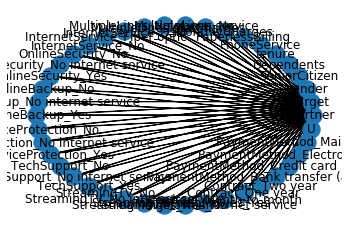

In [6]:
model= CausalModel(
        data=df,
        treatment='Partner',
        outcome="target",
        common_causes=['gender', 'SeniorCitizen', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
        instruments=[])
model.view_model(layout="dot")

Setting treatment column type to bool


In [0]:
df['Partner'] = df['Partner'].apply(bool)

In [8]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,target,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,True,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,False,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,False,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,False,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,False,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [0]:
y = df.target
X = df.drop(['target'], axis = 1)

View Model


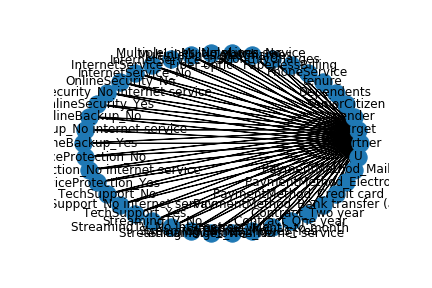

In [10]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

Identify effect


In [11]:
identified_estimand = model.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['PhoneService', 'Contract_One year', 'MonthlyCharges', 'TechSupport_Yes', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'Dependents', 'gender', 'PaymentMethod_Electronic check', 'PaymentMethod_Credit card (automatic)', 'StreamingTV_No', 'MultipleLines_No phone service', 'PaymentMethod_Mailed check', 'SeniorCitizen', 'TechSupport_No internet service', 'DeviceProtection_No', 'StreamingTV_No internet service', 'InternetService_Fiber optic', 'PaymentMethod_Bank transfer (automatic)', 'OnlineBackup_No', 'StreamingMovies_Yes', 'U', 'TotalCharges', 'InternetService_No', 'Contract_Month-to-month', 'tenure', 'OnlineSecurity_No', 'DeviceProtection_No internet service', 'PaperlessBilling', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_No', 'InternetService_DSL', 'MultipleLines_No', 'StreamingTV_Yes', 'OnlineBackup_No internet service', 'Contract_Two year', 'StreamingMovies_No', 'MultipleLines_Yes', 'Stre

WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
──────────(Expectation(target|PhoneService,Contract_One year,MonthlyCharges,Te
d[Partner]                                                                    

                                                                              
chSupport_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,Dependents
                                                                              

                                                                              
,gender,PaymentMethod_Electronic check,PaymentMethod_Credit card (automatic),S
                                                                              

                                                                              
treamingTV_No,MultipleLines_No phone service,PaymentMethod_Mailed check,Senior
                                 

In [12]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['PhoneService', 'Contract_One year', 'MonthlyCharges', 'TechSupport_Yes', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'Dependents', 'gender', 'PaymentMethod_Electronic check', 'PaymentMethod_Credit card (automatic)', 'StreamingTV_No', 'MultipleLines_No phone service', 'PaymentMethod_Mailed check', 'SeniorCitizen', 'TechSupport_No internet service', 'DeviceProtection_No', 'StreamingTV_No internet service', 'InternetService_Fiber optic', 'PaymentMethod_Bank transfer (automatic)', 'OnlineBackup_No', 'StreamingMovies_Yes', 'U', 'TotalCharges', 'InternetService_No', 'Contract_Month-to-month', 'tenure', 'OnlineSecurity_No', 'DeviceProtection_No internet service', 'PaperlessBilling', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_No', 'InternetService_DSL', 'MultipleLines_No', 'StreamingTV_Yes', 'OnlineBackup_No internet service', 'Contract_Two year', 'StreamingMovies_No', 'MultipleLines_Yes', 'Stre

Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
──────────(Expectation(target|PhoneService,Contract_One year,MonthlyCharges,Te
d[Partner]                                                                    

                                                                              
chSupport_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,Dependents
                                                                              

                                                                              
,gender,PaymentMethod_Electronic check,PaymentMethod_Credit card (automatic),S
                                                                              

                                                                              
treamingTV_No,MultipleLines_No phone service,PaymentMethod_Mailed check,Senior
                                 

In [13]:
causal_estimate = model.estimate_effect(identified_estimand,method_name="backdoor.propensity_score_stratification")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: target~Partner+PhoneService+Contract_One year+MonthlyCharges+TechSupport_Yes+OnlineSecurity_No internet service+OnlineSecurity_Yes+Dependents+gender+PaymentMethod_Electronic check+PaymentMethod_Credit card (automatic)+StreamingTV_No+MultipleLines_No phone service+PaymentMethod_Mailed check+SeniorCitizen+TechSupport_No internet service+DeviceProtection_No+StreamingTV_No internet service+InternetService_Fiber optic+PaymentMethod_Bank transfer (automatic)+OnlineBackup_No+StreamingMovies_Yes+TotalCharges+InternetService_No+Contract_Month-to-month+tenure+OnlineSecurity_No+DeviceProtection_No internet service+PaperlessBilling+OnlineBackup_Yes+DeviceProtection_Yes+TechSupport_No+InternetService_DSL+MultipleLines_No+StreamingTV_Yes+OnlineBackup_No internet service+Contract_Two year+StreamingMovies_No+MultipleLines_Yes+StreamingMovies_No internet service
/usr/local/lib/python3.6/dist

*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
──────────(Expectation(target|PhoneService,Contract_One year,MonthlyCharges,Te
d[Partner]                                                                    

                                                                              
chSupport_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,Dependents
                                                                              

                                                                              
,gender,PaymentMethod_Electronic check,PaymentMethod_Credit card (automatic),S
                                                                              

                                                                              
treamingTV_No,MultipleLines_No phone service,PaymentMethod_Mailed ch

In [14]:
# Causal effect on the control group (ATC)
causal_estimate_att = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification",
        target_units = "atc")
print(causal_estimate_att)
print("Causal Estimate is " + str(causal_estimate_att.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: target~Partner+PhoneService+Contract_One year+MonthlyCharges+TechSupport_Yes+OnlineSecurity_No internet service+OnlineSecurity_Yes+Dependents+gender+PaymentMethod_Electronic check+PaymentMethod_Credit card (automatic)+StreamingTV_No+MultipleLines_No phone service+PaymentMethod_Mailed check+SeniorCitizen+TechSupport_No internet service+DeviceProtection_No+StreamingTV_No internet service+InternetService_Fiber optic+PaymentMethod_Bank transfer (automatic)+OnlineBackup_No+StreamingMovies_Yes+TotalCharges+InternetService_No+Contract_Month-to-month+tenure+OnlineSecurity_No+DeviceProtection_No internet service+PaperlessBilling+OnlineBackup_Yes+DeviceProtection_Yes+TechSupport_No+InternetService_DSL+MultipleLines_No+StreamingTV_Yes+OnlineBackup_No internet service+Contract_Two year+StreamingMovies_No+MultipleLines_Yes+StreamingMovies_No internet service
/usr/local/lib/python3.6/dist

*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
──────────(Expectation(target|PhoneService,Contract_One year,MonthlyCharges,Te
d[Partner]                                                                    

                                                                              
chSupport_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,Dependents
                                                                              

                                                                              
,gender,PaymentMethod_Electronic check,PaymentMethod_Credit card (automatic),S
                                                                              

                                                                              
treamingTV_No,MultipleLines_No phone service,PaymentMethod_Mailed ch

In [15]:
# Identify causal effect and return target estimands
identified_estimand = model.identify_effect()

# Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")

# Refute the obtained estimate using multiple robustness checks.
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['PhoneService', 'Contract_One year', 'MonthlyCharges', 'TechSupport_Yes', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'Dependents', 'gender', 'PaymentMethod_Electronic check', 'PaymentMethod_Credit card (automatic)', 'StreamingTV_No', 'MultipleLines_No phone service', 'PaymentMethod_Mailed check', 'SeniorCitizen', 'TechSupport_No internet service', 'DeviceProtection_No', 'StreamingTV_No internet service', 'InternetService_Fiber optic', 'PaymentMethod_Bank transfer (automatic)', 'OnlineBackup_No', 'StreamingMovies_Yes', 'U', 'TotalCharges', 'InternetService_No', 'Contract_Month-to-month', 'tenure', 'OnlineSecurity_No', 'DeviceProtection_No internet service', 'PaperlessBilling', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_No', 'InternetService_DSL', 'MultipleLines_No', 'StreamingTV_Yes', 'OnlineBackup_No internet service', 'Contract_Two year', 'StreamingMovies_No', 'MultipleLines_Yes', 'Stre

WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: target~Partner+PhoneService+Contract_One year+MonthlyCharges+TechSupport_Yes+OnlineSecurity_No internet service+OnlineSecurity_Yes+Dependents+gender+PaymentMethod_Electronic check+PaymentMethod_Credit card (automatic)+StreamingTV_No+MultipleLines_No phone service+PaymentMethod_Mailed check+SeniorCitizen+TechSupport_No internet service+DeviceProtection_No+StreamingTV_No internet service+InternetService_Fiber optic+PaymentMethod_Bank transfer (automatic)+OnlineBackup_No+StreamingMovies_Yes+TotalCharges+InternetService_No+Contract_Month-to-month+tenure+OnlineSecurity_No+DeviceProtection_No internet service+PaperlessBilling+OnlineBackup_Yes+DeviceProtection_Yes+TechSupport_No+InternetService_DSL+MultipleLines_No+StreamingTV_Yes+OnlineBackup_No internet service+Contract_Two year+StreamingMovies_No+Multiple

In [16]:
print(refute_results)

Refute: Add a Random Common Cause
Estimated effect:(0.018316058497799232,)
New effect:(0.0011358795967627432,)



In [17]:
print(estimate)

*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
──────────(Expectation(target|PhoneService,Contract_One year,MonthlyCharges,Te
d[Partner]                                                                    

                                                                              
chSupport_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,Dependents
                                                                              

                                                                              
,gender,PaymentMethod_Electronic check,PaymentMethod_Credit card (automatic),S
                                                                              

                                                                              
treamingTV_No,MultipleLines_No phone service,PaymentMethod_Mailed ch

In [18]:
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9, random_seed = 1)
print(res_subset)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: target~Partner+PhoneService+Contract_One year+MonthlyCharges+TechSupport_Yes+OnlineSecurity_No internet service+OnlineSecurity_Yes+Dependents+gender+PaymentMethod_Electronic check+PaymentMethod_Credit card (automatic)+StreamingTV_No+MultipleLines_No phone service+PaymentMethod_Mailed check+SeniorCitizen+TechSupport_No internet service+DeviceProtection_No+StreamingTV_No internet service+InternetService_Fiber optic+PaymentMethod_Bank transfer (automatic)+OnlineBackup_No+StreamingMovies_Yes+TotalCharges+InternetService_No+Contract_Month-to-month+tenure+OnlineSecurity_No+DeviceProtection_No internet service+PaperlessBilling+OnlineBackup_Yes+DeviceProtection_Yes+TechSupport_No+InternetService_DSL+MultipleLines_No+StreamingTV_Yes+OnlineBackup_No internet service+Contract_Two year+StreamingMovies_No+MultipleLines_Yes+StreamingMovies_No internet service
/usr/local/lib/python3.6/dist-packa

Refute: Use a subset of data
Estimated effect:(0.018316058497799232,)
New effect:(-0.007256665089130778,)



In [19]:
res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: target~placebo+PhoneService+Contract_One year+MonthlyCharges+TechSupport_Yes+OnlineSecurity_No internet service+OnlineSecurity_Yes+Dependents+gender+PaymentMethod_Electronic check+PaymentMethod_Credit card (automatic)+StreamingTV_No+MultipleLines_No phone service+PaymentMethod_Mailed check+SeniorCitizen+TechSupport_No internet service+DeviceProtection_No+StreamingTV_No internet service+InternetService_Fiber optic+PaymentMethod_Bank transfer (automatic)+OnlineBackup_No+StreamingMovies_Yes+TotalCharges+InternetService_No+Contract_Month-to-month+tenure+OnlineSecurity_No+DeviceProtection_No internet service+PaperlessBilling+OnlineBackup_Yes+DeviceProtection_Yes+TechSupport_No+InternetService_DSL+MultipleLines_No+StreamingTV_Yes+OnlineBackup_No internet service+Contract_Two year+StreamingMovies_No+MultipleLines_Yes+StreamingMovies_No internet service
/usr/local/lib/python3.6/dist-packa

Refute: Use a Placebo Treatment
Estimated effect:(0.018316058497799232,)
New effect:(-0.015618344455487718,)



In [20]:
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: target~Partner+PhoneService+Contract_One year+MonthlyCharges+TechSupport_Yes+OnlineSecurity_No internet service+OnlineSecurity_Yes+Dependents+gender+PaymentMethod_Electronic check+PaymentMethod_Credit card (automatic)+StreamingTV_No+MultipleLines_No phone service+PaymentMethod_Mailed check+SeniorCitizen+TechSupport_No internet service+DeviceProtection_No+StreamingTV_No internet service+InternetService_Fiber optic+PaymentMethod_Bank transfer (automatic)+OnlineBackup_No+StreamingMovies_Yes+TotalCharges+InternetService_No+Contract_Month-to-month+tenure+OnlineSecurity_No+DeviceProtection_No internet service+PaperlessBilling+OnlineBackup_Yes+DeviceProtection_Yes+TechSupport_No+InternetService_DSL+MultipleLines_No+StreamingTV_Yes+OnlineBackup_No internet service+Contract_Two year+StreamingMovies_No+MultipleLines_Yes+StreamingMovies_No internet service+w_random
/usr/local/lib/python3.6/d

Refute: Add a Random Common Cause
Estimated effect:(0.018316058497799232,)
New effect:(0.0001419849495953429,)



In [21]:
causal_estimate_reg = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(causal_estimate_reg)
print("Causal Estimate is " + str(causal_estimate_reg.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: target~Partner+PhoneService+Contract_One year+MonthlyCharges+TechSupport_Yes+OnlineSecurity_No internet service+OnlineSecurity_Yes+Dependents+gender+PaymentMethod_Electronic check+PaymentMethod_Credit card (automatic)+StreamingTV_No+MultipleLines_No phone service+PaymentMethod_Mailed check+SeniorCitizen+TechSupport_No internet service+DeviceProtection_No+StreamingTV_No internet service+InternetService_Fiber optic+PaymentMethod_Bank transfer (automatic)+OnlineBackup_No+StreamingMovies_Yes+TotalCharges+InternetService_No+Contract_Month-to-month+tenure+OnlineSecurity_No+DeviceProtection_No internet service+PaperlessBilling+OnlineBackup_Yes+DeviceProtection_Yes+TechSupport_No+InternetService_DSL+MultipleLines_No+StreamingTV_Yes+OnlineBackup_No internet service+Contract_Two year+StreamingMovies_No+MultipleLines_Yes+StreamingMovies_No internet service


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
──────────(Expectation(target|PhoneService,Contract_One year,MonthlyCharges,Te
d[Partner]                                                                    

                                                                              
chSupport_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,Dependents
                                                                              

                                                                              
,gender,PaymentMethod_Electronic check,PaymentMethod_Credit card (automatic),S
                                                                              

                                                                              
treamingTV_No,MultipleLines_No phone service,PaymentMethod_Mailed ch

## **Interpretation**

In my model that predicts whether or not a person stops using the telecom service, my hypothesis is that if a customer is a senior resident influences whether or not customer is more likely to churn.

The p-value of more than 0.001 i.e. 0.464 tells us that there is no causal relaationship between the treatment and the outcome.

Moreover, the value for causal estimate does not remain robust and varies by a lot in our attempts of refuting the estimate.

We conclude that there is no Causal Relationship between treatment and the outcome.